<a href="https://colab.research.google.com/github/lcy042000/DeepLearning_TermProject/blob/main/DeepLearning_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
#컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:

#수정한 컨볼루션 신경망
revisedModel = Sequential()
revisedModel.add(Conv2D(64, kernel_size=(2,2), input_shape=(28,28,1), activation='relu')) #kernel 수 64개로 증가, kernel_size (5, 5)로 변경
revisedModel.add(Conv2D(64, (3,3), activation='relu'))
revisedModel.add(MaxPooling2D(pool_size=(5,5)))
revisedModel.add(Dropout(0.35)) #Dropout 비율 35%로 증가
revisedModel.add(Flatten())
revisedModel.add(Dense(128, activation='relu'))
revisedModel.add(Dropout(0.5))
revisedModel.add(Dense(10, activation='softmax'))

In [7]:
#모델의 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
revisedModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#모델 최적화 설정
modelpath = "./MNIST_CNN.hdf5"
modelpath2 = "./MNIST_CNN.hdf6"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath=modelpath2, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

In [10]:
#모델 실행
history=model.fit(X_train, y_train, validation_split=0.25, epochs=30,batch_size=200,verbose=0, callbacks=[early_stopping_callback,checkpointer])

#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

#검증셋과 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# #그래프
# x_len = np.arange(len(y_loss))
# plt.plot(x_len, y_vloss, marker='.', c='red',label='Testset_loss')
# plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")
# plt.legend(loc='upper right')
# plt.grid()
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()


Epoch 1: val_loss improved from inf to 0.08031, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08031 to 0.05407, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05407 to 0.04710, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04710 to 0.04335, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04335 to 0.04138, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04138

Epoch 7: val_loss improved from 0.04138 to 0.04137, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04137

Epoch 9: val_loss improved from 0.04137 to 0.04061, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.04061 to 0.03890, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.03890

Epoch 12: val_loss did not improve from 0.03890

Epoch 13: val_loss improved from 0.03890 to 0.03847, saving model to ./MNIST_CNN.hdf5

Epoch 14: val_loss improved from 

In [11]:
revisedHistory = revisedModel.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer2])

print("\n revisedModel Test Accuracy: %.4f" %(revisedModel.evaluate(X_test, y_test)[1]))

y_revisedVloss = revisedHistory.history['val_loss']
y_revisedLoss = revisedHistory.history['loss'] 


Epoch 1: val_loss improved from inf to 0.10836, saving model to ./MNIST_CNN.hdf6



Epoch 2: val_loss improved from 0.10836 to 0.07236, saving model to ./MNIST_CNN.hdf6



Epoch 3: val_loss improved from 0.07236 to 0.05794, saving model to ./MNIST_CNN.hdf6



Epoch 4: val_loss improved from 0.05794 to 0.05453, saving model to ./MNIST_CNN.hdf6



Epoch 5: val_loss improved from 0.05453 to 0.04824, saving model to ./MNIST_CNN.hdf6



Epoch 6: val_loss improved from 0.04824 to 0.04554, saving model to ./MNIST_CNN.hdf6



Epoch 7: val_loss did not improve from 0.04554

Epoch 8: val_loss improved from 0.04554 to 0.04098, saving model to ./MNIST_CNN.hdf6



Epoch 9: val_loss improved from 0.04098 to 0.04082, saving model to ./MNIST_CNN.hdf6



Epoch 10: val_loss improved from 0.04082 to 0.03730, saving model to ./MNIST_CNN.hdf6



Epoch 11: val_loss improved from 0.03730 to 0.03565, saving model to ./MNIST_CNN.hdf6



Epoch 12: val_loss did not improve from 0.03565

Epoch 13: val_loss did not improve from 0.03565

Epoch 14: val_loss improved from 0.03565 to 0.03338, saving model to ./MNIST_CNN.hdf6



Epoch 15: val_loss did not improve from 0.03338

Epoch 16: val_loss did not improve from 0.03338

Epoch 17: val_loss did not improve from 0.03338

Epoch 18: val_loss did not improve from 0.03338

Epoch 19: val_loss did not improve from 0.03338

Epoch 20: val_loss did not improve from 0.03338

Epoch 21: val_loss did not improve from 0.03338

Epoch 22: val_loss did not improve from 0.03338

Epoch 23: val_loss did not improve from 0.03338

Epoch 24: val_loss did not improve from 0.03338
313/313 [==============================] - 13s 40ms/step - loss: 0.0288 - accuracy: 0.9913

 revisedModel Test Accuracy: 0.9913


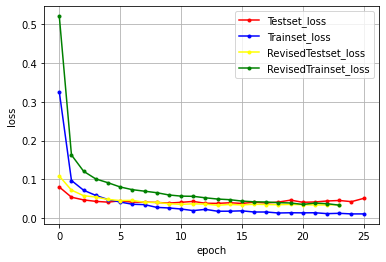

In [12]:
x_len = np.arange(len(y_loss))
x_revisedLen = np.arange(len(y_revisedLoss))
plt.plot(x_len, y_vloss, marker='.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")
plt.plot(x_revisedLen, y_revisedVloss, marker='.', c='yellow',label='RevisedTestset_loss')
plt.plot(x_revisedLen, y_revisedLoss, marker='.', c='green', label="RevisedTrainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()